<a href="https://colab.research.google.com/github/junnu01/Spam-Email-Classifier-using-SVM-/blob/main/Spam_Email_Classifier_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
# You can download the dataset from: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [4]:
# Test on new sample input
sample = ["Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now."]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)

print("Spam" if prediction[0] == 1 else "Ham")


Spam


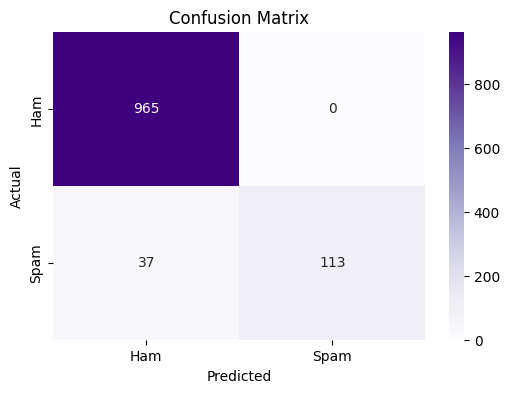

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


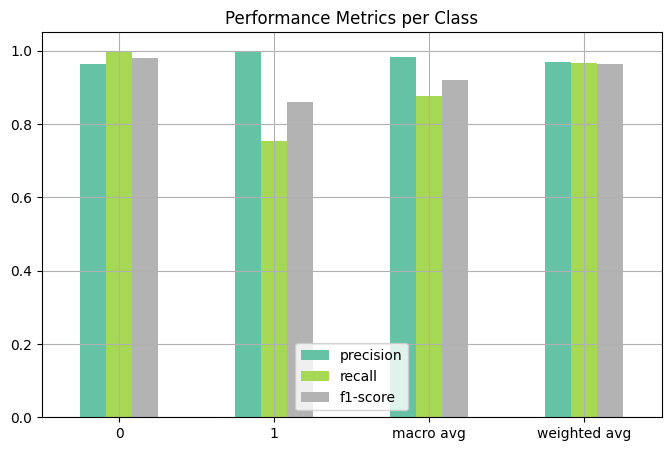

In [6]:
from sklearn.metrics import classification_report
import pandas as pd

# Get report dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot as table
df_report.drop('accuracy', inplace=True)
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title('Performance Metrics per Class')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


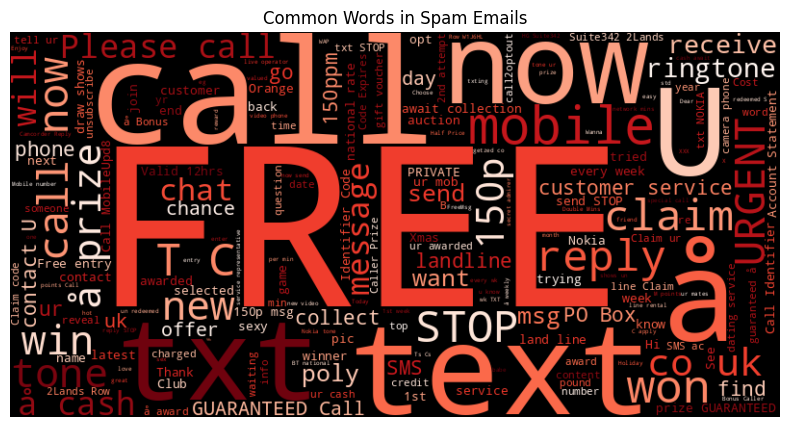

In [7]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 1]['text'])
ham_words = ' '.join(df[df['label'] == 0]['text'])

# Plot spam word cloud
spam_cloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Spam Emails')
plt.show()

